In [146]:
library(tidyverse)
library(GGally)
library(caret)

# Describe the data
Individual medical costs billed by health insurance based various features, like age, sex, bmi, number of children, smoke status, and regions. 

# Load the data

In [147]:
df <- read.csv("Medical_Cost.csv")
head(df)

age sex    bmi    children smoker region    charges  
1 19  female 27.900 0        yes    southwest 16884.924
2 18  male   33.770 1        no     southeast  1725.552
3 28  male   33.000 3        no     southeast  4449.462
4 33  male   22.705 0        no     northwest 21984.471
5 32  male   28.880 0        no     northwest  3866.855
6 31  female 25.740 0        no     southeast  3756.622

# Explore your dataset

In [148]:
# summary of the dataset
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

In [149]:
# check missing values
sum(is.na(df))

[1] 0

# Initial thoughts
1. In this dataset, there's no missing values
2. There seems to be some outliers in the column, charges.

# Wrangling
As the dataset is clean, we cannot do much about data pre-processing. However, we divided the age and bmi variables into 4 categories for analysis. If we are going to make prediction in the future, we can do one-hot encoding on categorical variables (such as sex, region, and smoker) and removing missing values.

# Research Questions
### Are any relevant corralection between the ratio of multiple quantitative variables; such as age/bmi vs charges/children?



In [150]:
df$age_bmi_ratio = df$age/df$bmi 
df$charges_children_ratio = df$charges/df$children


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 574 rows containing non-finite values (stat_smooth).”


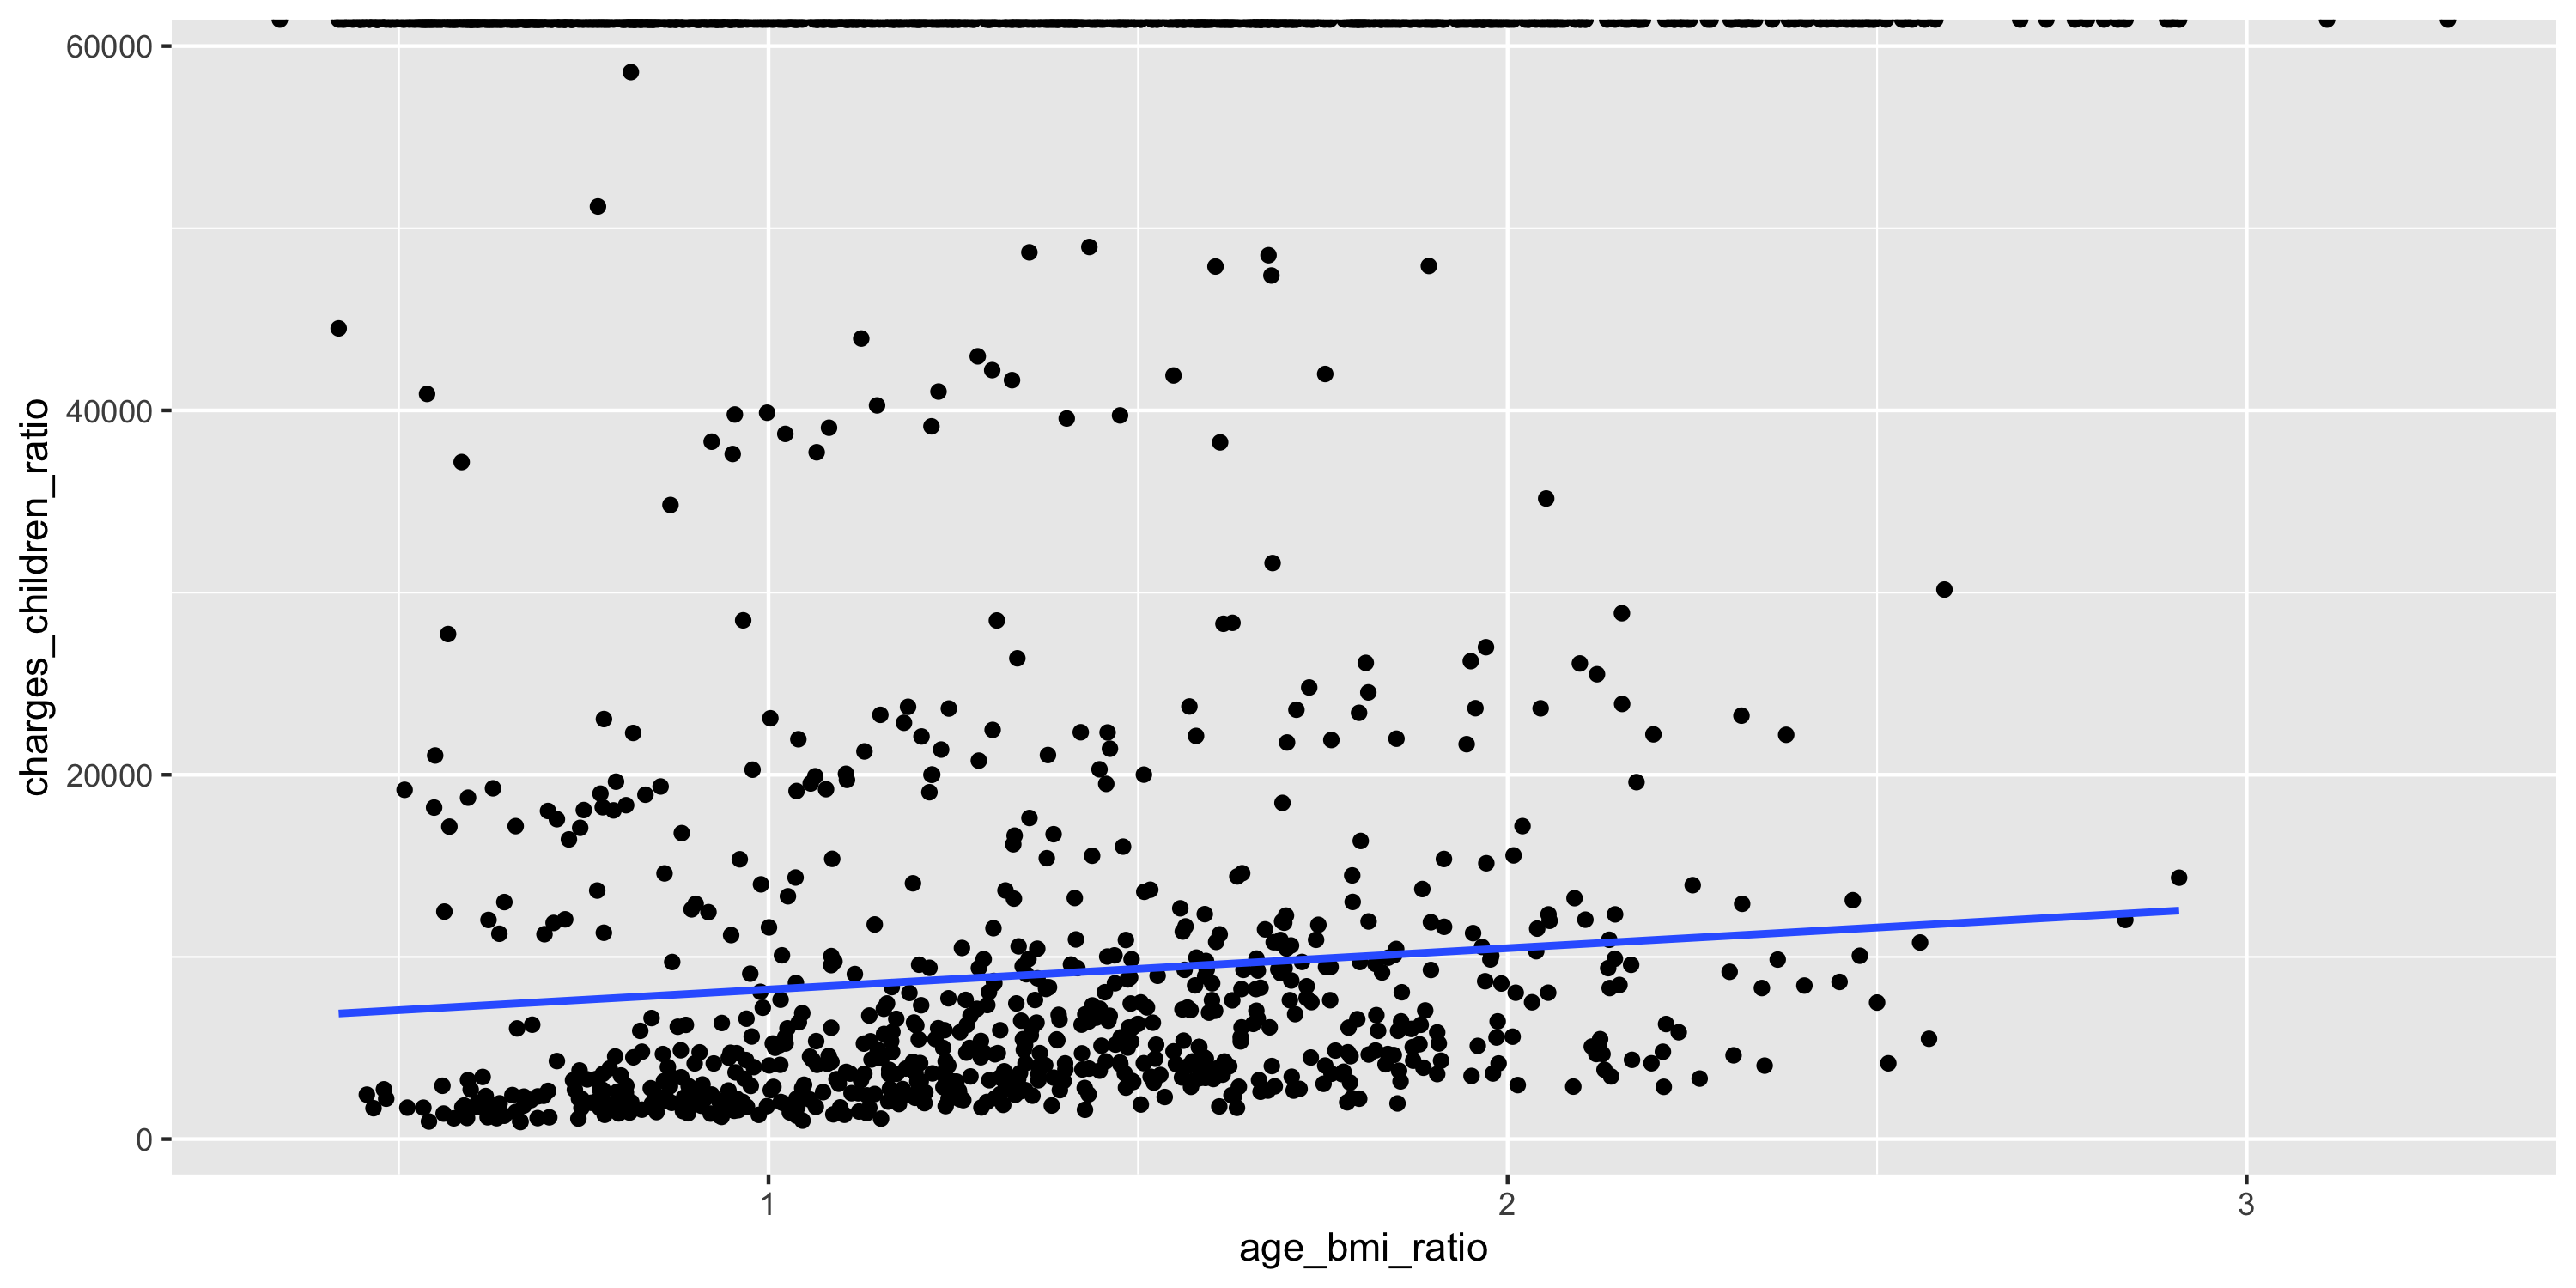

In [151]:
ggplot(df, aes(x=age_bmi_ratio, y=charges_children_ratio)) + geom_point()+ 
geom_smooth(method=lm, se=FALSE)

We observed a weak positive correlation between age/bmi and charges/children


### Which are the top 10 states with the highest charges(based on this sample data)?

In [152]:
df$charges = sort(df$charges, decreasing = TRUE, na.last = TRUE)

In [154]:
head(df,10)

age sex    bmi    children smoker region    charges  age_bmi_ratio
1  19  female 27.900 0        yes    southwest 63770.43 0.6810036    
2  18  male   33.770 1        no     southeast 62592.87 0.5330175    
3  28  male   33.000 3        no     southeast 60021.40 0.8484848    
4  33  male   22.705 0        no     northwest 58571.07 1.4534244    
5  32  male   28.880 0        no     northwest 55135.40 1.1080332    
6  31  female 25.740 0        no     southeast 52590.83 1.2043512    
7  46  female 33.440 1        no     southeast 51194.56 1.3755981    
8  37  female 27.740 3        no     northwest 49577.66 1.3338140    
9  37  male   29.830 2        no     northeast 48970.25 1.2403621    
10 60  female 25.840 0        no     northwest 48885.14 2.3219814    
   charges_children_ratio
1       Inf              
2  1725.552              
3  1483.154              
4       Inf              
5       Inf              
6       Inf              
7  8240.590              
8  2427.169              
9  3203.205              
10      Inf

The top 10 states with the highest charges are shown in the region column in the data frame above


### Can we plot the regions with oldest population and higest charges?

In [155]:
new_df <- df %>% group_by(region, age) %>% summarise(Mean_charges = mean(charges, na.rm=TRUE))

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



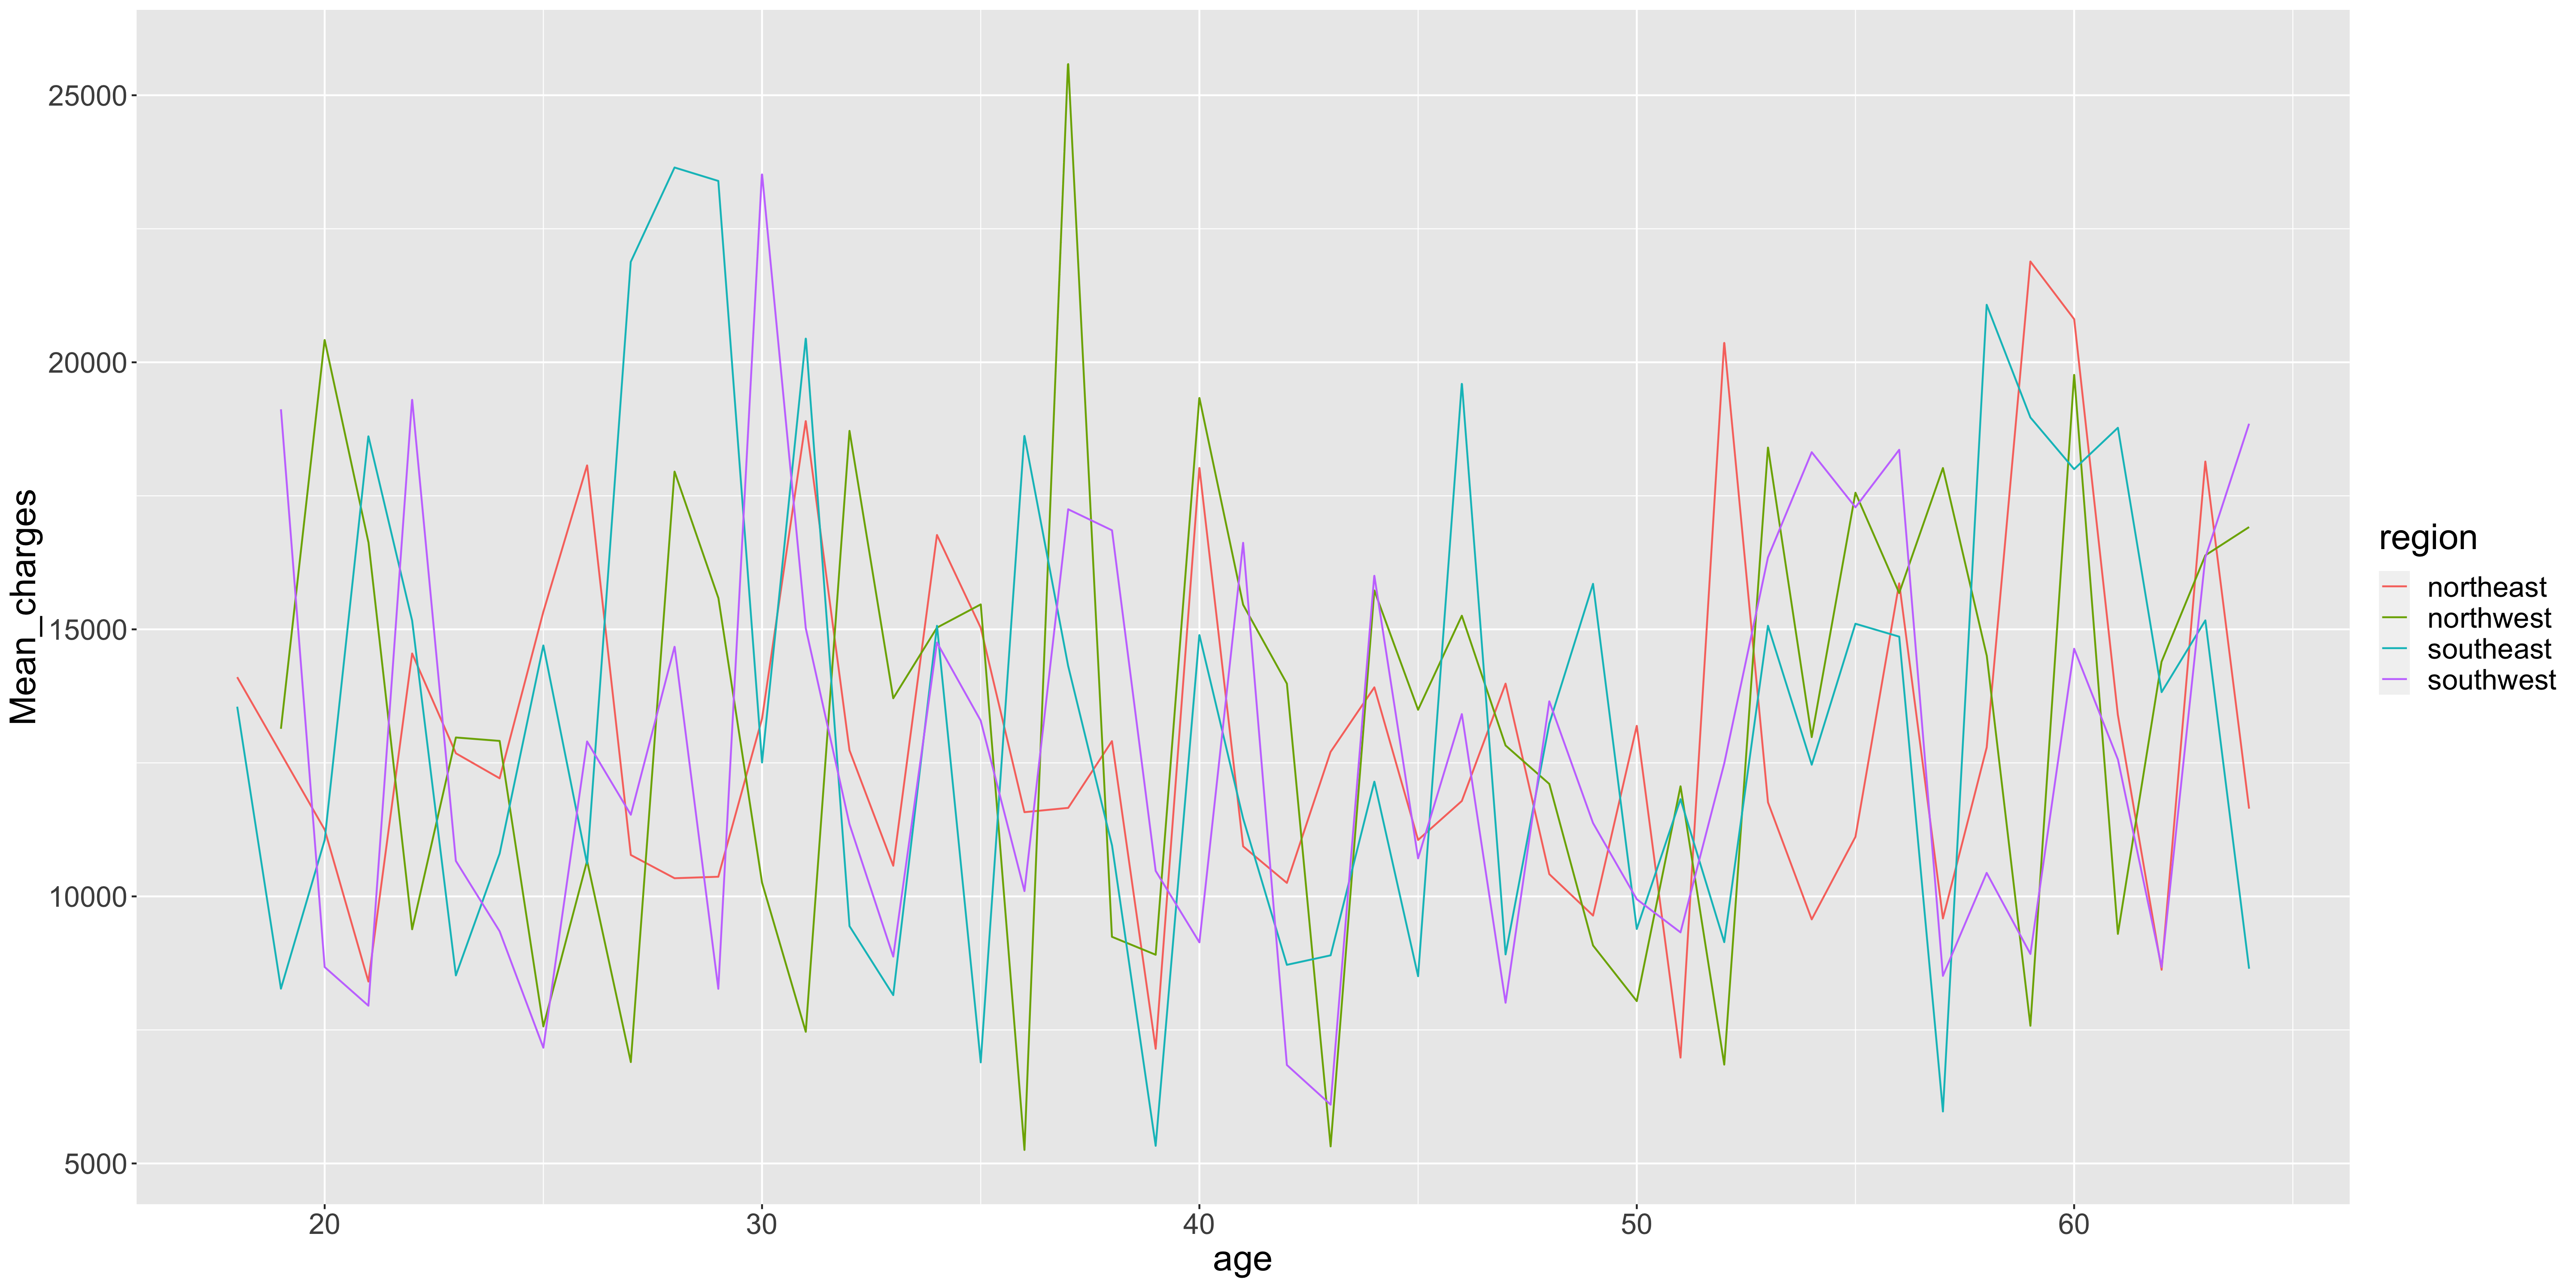

In [156]:
options(repr.plot.width=20, repr.plot.height=10, repr.plot.res = 300)
ggplot(new_df) + aes(x=age, 
                 y=Mean_charges, 
                 color=region)+ 
            geom_line()+
            theme(text = element_text(size = 20)) 

# Data analysis & visualizations
Let’s look at the relationships between the charges and other numerical columns.

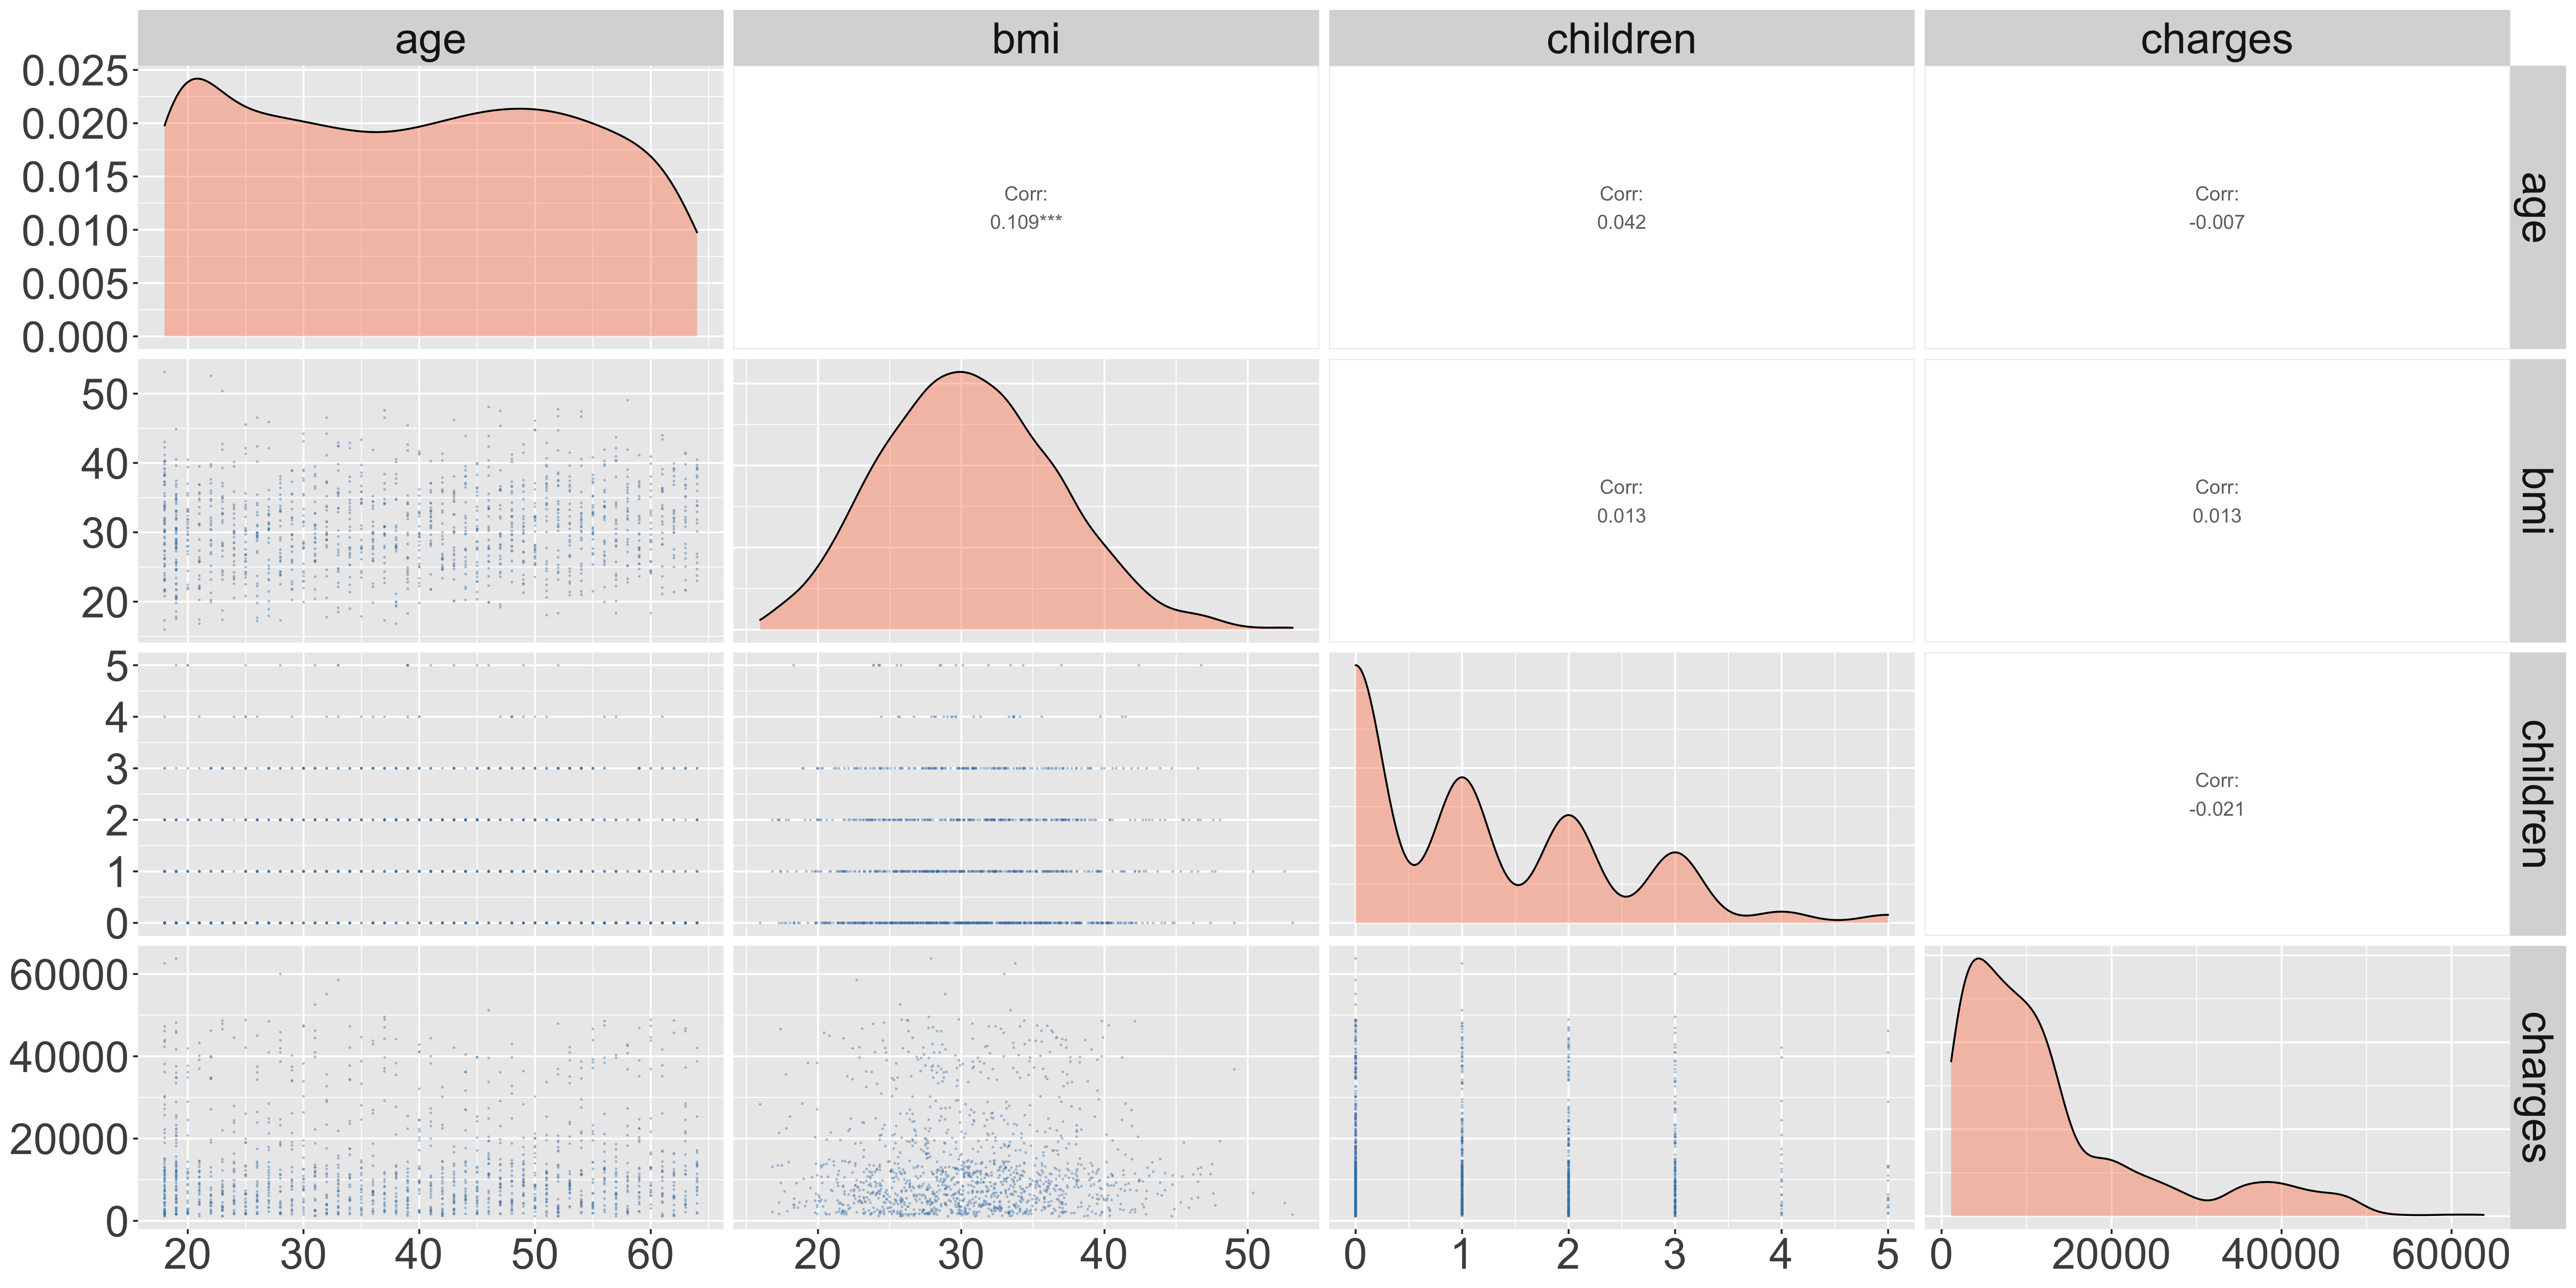

In [96]:
GGally::ggpairs(df %>% select_if(is.numeric)%>% subset(select = -c(charges_children_ratio, age_bmi_ratio)),
                progress = FALSE,
                lower = list(continuous = GGally::wrap('points', alpha = 0.3, size=0.1, color = 'steelblue')),
                diag = list(continuous = GGally::wrap('densityDiag', fill = 'coral', alpha = 0.4))) +
            theme(text = element_text(size = 30))

only BMI and age have weak correlation

In [170]:
temp = df %>% count(region, smoker)
holder = temp %>% 
  group_by(region) %>%
  summarise(smoker_nonsmoker_ratio=n[smoker == "yes"] / n[smoker == "no"])
temp2 = df%>%group_by(region)%>%summarise(median=median(charges))


In [171]:
holder$median_charges = temp2$median
holder

region    smoker_nonsmoker_ratio median_charges
1 northeast 0.2607004              9639.395      
2 northwest 0.2172285              8627.541      
3 southeast 0.3333333              9628.159      
4 southwest 0.2172285              9182.170

In [183]:
# options(repr.plot.width=5, repr.plot.height=3, repr.plot.res = 300)
# ggplot(holder, aes(y=median_charges,x=region)) + 
#     geom_bar(position="dodge", stat="identity")+geom_col()+
#             theme(text = element_text(size = 10))

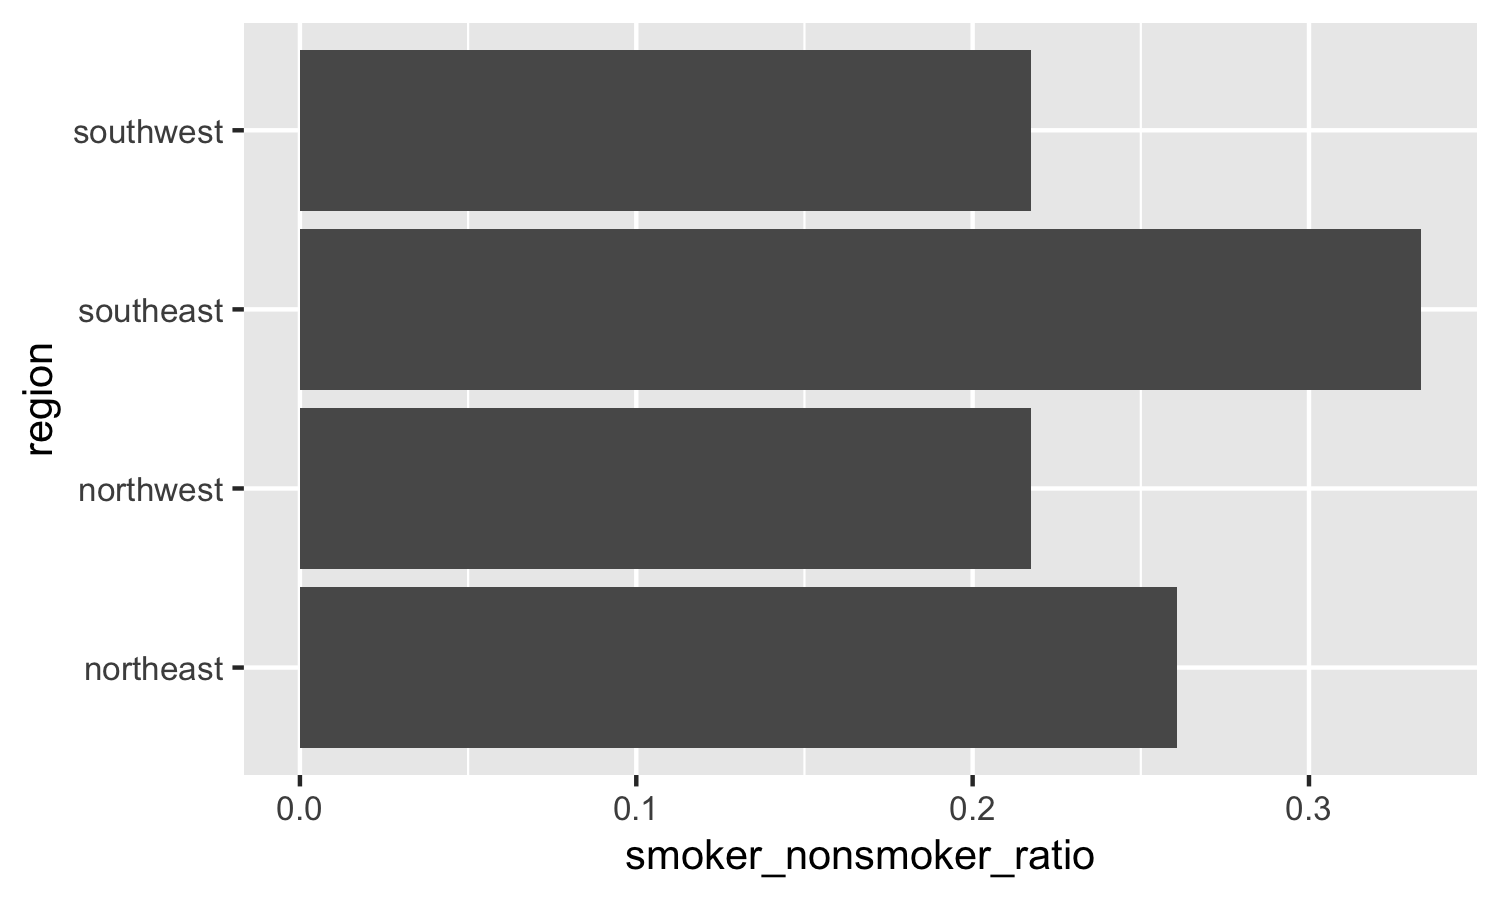

In [186]:
options(repr.plot.width=5, repr.plot.height=3, repr.plot.res = 300)
ggplot(holder, aes(x=smoker_nonsmoker_ratio,y=region)) + 
    geom_bar(position="dodge", stat="identity")+geom_col()+
            theme(text = element_text(size = 10))

We performed the above visualization to check which region wise analysis for smoker to non smoker ratio. By plotting the visualization we found that southeast region has highest smoker to non smoker ratio

In [187]:
df = df %>% 
  mutate(
    # Create categories
    age_group = dplyr::case_when(
      age > 15 & age <= 24 ~ "youth",
      age > 24 & age <= 44 ~ "adult",
      age > 44 & age <= 64 ~ "middle age",
      age > 64             ~ "senior"
    ),
    # Convert to factor
    age_group = factor(
      age_group,
      level = c("youth", "adult","middle age", "senior")
    )
  )

In [188]:
df = df %>% 
  mutate(
    # Create categories
    BMI_group = dplyr::case_when(
      bmi <= 18.5 ~ "underweight",
      bmi > 18.5 & bmi <= 25 ~ "healthy weight",
      bmi > 25 & bmi <= 30 ~ "Overweight",
      bmi > 30             ~ "Obesity"
    ),
    # Convert to factor
    BMI_group = factor(
      BMI_group,
      level = c("underweight", "healthy weight","Overweight","Obesity")
    )
  )

In [189]:
charges_bygroups <- df%>%group_by(age_group, smoker,BMI_group) %>% summarise(Median_charges=median(charges))

`summarise()` has grouped output by 'age_group', 'smoker'. You can override using the `.groups` argument.



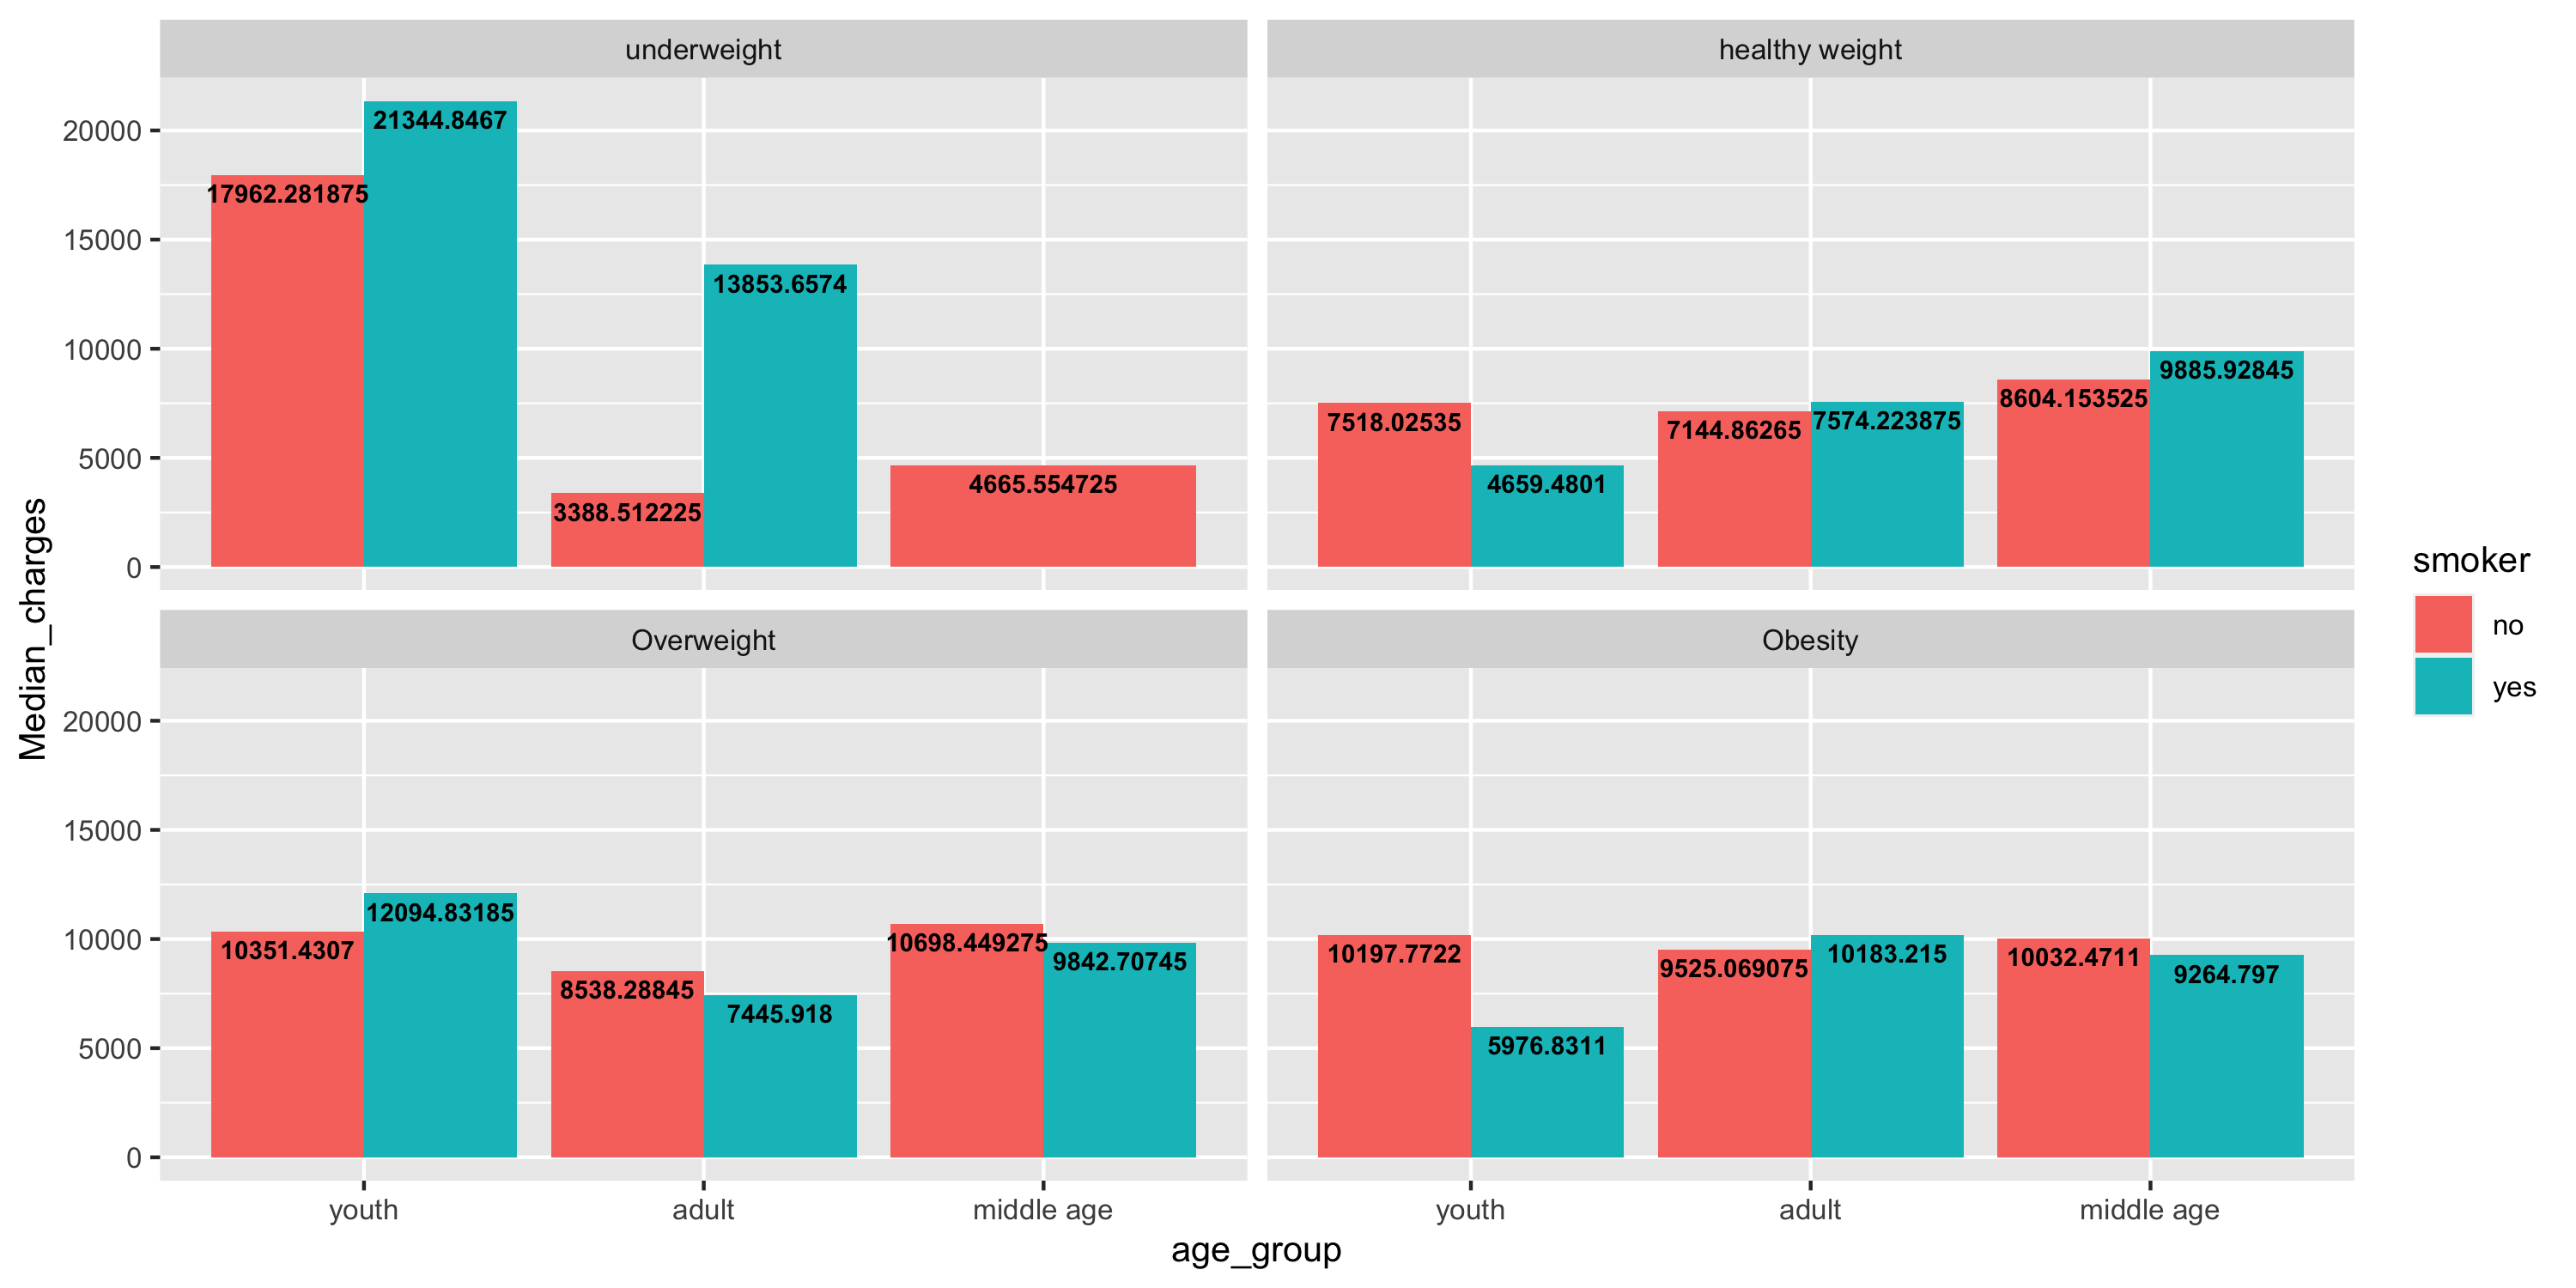

In [190]:
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 300)
ggplot(charges_bygroups, aes(fill=smoker, y=Median_charges, x=age_group)) + 
    geom_bar(position="dodge", stat="identity")+ facet_wrap(vars(BMI_group))+
geom_text(aes(label = Median_charges), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 2.5)+
            theme(text = element_text(size = 10))

Assumption: We performed the above visualization to check whether the worst health condition (obese and middle age) leads to higher medical expenses. 

Analysis: However, we found that the younger generation who smokes and are under weight have a lot higher medical expenses than other categories.


# Two follow-up research questions

1. 

2. 